#Chapter 1: Introduction and probability basics (exercises)

In [5]:
%pylab inline
import numpy as np
from scipy import stats
import pylab as plt
import figrc

theme = figrc.Theme_Gray() + figrc.Theme_Ezrc(16, 1, 22)
theme.apply()

Populating the interactive namespace from numpy and matplotlib


## Binomial

This probability distribution describes processes in which an event can have only one of two possible outcomes, such as tossing a coin, detecting something at a security check, or winning the lottery, where $p$ is the probability of one event, call it "success" and (therefore) $1-p$ is the probability of the other event, call it "failure". If the trial is repeated independently n times, then we are interested in the probability of getting a total of exactly $r$ successes, call it $P (r \mid p, n)$.

plot $P$ vs. $r$ for fixed $n$ and first a fixed $p$, then a range of $p$.

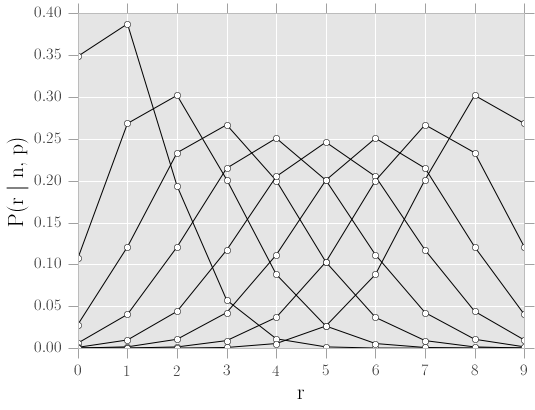

In [2]:
r = np.arange(0, 10, 1)
p = np.arange(0.1, 0.9, 0.1)
for pk in p:
    p_r = stats.binom.pmf(r, n=10, p=pk)
    plt.plot(r, p_r, 'o-', color='k', mfc='w',)
plt.xlabel('r')
plt.ylabel('P(r $\mid$ n, p)');

$P (r \mid p, n)$ vs. $r$ for fixed $n=10$ for various values of $p$. The distribution is discrete: points are joined with lines just to help identification of the points with common $p$.

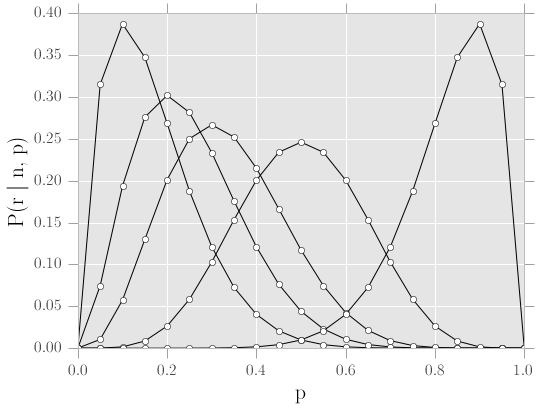

In [3]:
r = [1, 2, 3, 5, 9]
p = np.arange(0., 1.01, 0.05)
for rk in r:
    p_r = stats.binom.pmf(rk, n=10, p=p)
    plt.plot(p, p_r, 'o-', color='k', mfc='w')
plt.xlabel('p')
plt.ylabel('P(r $\mid$ n, p)');

$P (r \mid p, n)$ vs. $p$ for fixed $n$ for various values of $r$. 
**Note that this latter plot is not a probability distribution function over $p$.**

## Beta
A convenient prior for some quantity $p$ bound to lie between $0$ and $1$, is the beta distribution, which is
described by two parameters, the shape and scale.

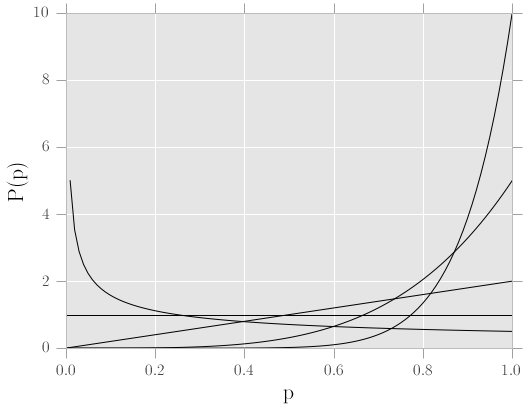

In [4]:
p = np.arange(0., 1.001, 0.01)
for alpha in (0.5, 1, 2, 5, 10):
    p_beta = stats.beta.pdf(p, a=alpha, b=1.)
    plt.plot(p, p_beta, color='k')
plt.xlabel('p')
plt.ylabel('P(p)');

## Poisson
The binomial distribution describes events in which there is a definite event taking place which has a
definite two way result: it's either a "success" or a "failure"; something happens or it doesn’t. A lot of
natural processes are only "one-way", by which I mean it's clear if they happened but not clear if they
didn't. For example, lightning strikes, α particle emission from a radioactive source. In these cases you
can't count non-events because we cannot identify a sequence of events where something is supposed
to happen or not. Suppose that on average these events occurs at a rate of $\lambda$, so that $\lambda$ is the expected
number of events in some unit time. We would like to find the probability that we get $r$ events in this
interval.

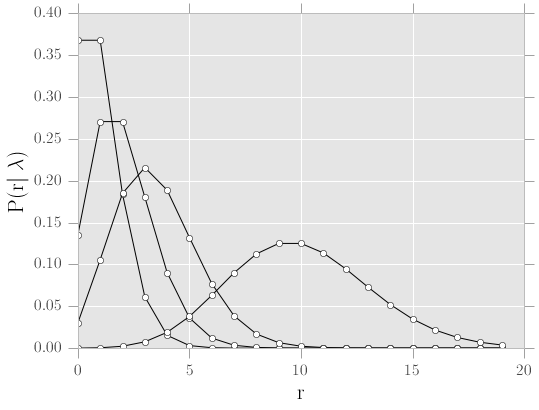

In [40]:
r = np.arange(0, 20, 1)

for l in (1,2,3.5,10):
    p = stats.poisson.pmf(r, l)
    plt.plot(r, p, 'ko-', mfc='w')
    
plt.xlabel('r')
plt.ylabel('P(r$\mid$ $\lambda$)');

### Example: Radioactive decay

Consider a radioactive source with half life $t_{1/2}$. If $N_0$ is the initial number of radioactive atoms, then
the number left after time $t$ is given by
$$N = N_0 \exp(−t/\tau ) = N_0 \exp(−\lambda t)$$

where $\tau = t_{1/2} / 2$. The mean (expected) number of decays per unit time is $\lambda = 1/\tau$ . The distribution of the number of decays per time interval is a Poisson distribution. To see this from a set of data, we record
the time at which decay occurs, and then divide the entire time span up into constant intervals of unit time. We then count how many of these intervals have 0, 1, 2, 3, etc. decays. When normalized, this is approximately a Poisson distribution with mean $1/\tau$.

We can demonstrate this using a simulation of radioactive decay. Let’s assume a source has a decay time
scale given by $\lambda = 10$ (per unit time interval). The number of decays in any unit time interval can be
simulated by drawing once from a Poisson distribution with this mean. We do this a large number of
times to simulate the data. Based just on these data, we then count how many of these intervals
have 0, 1, 2, 3, etc. decays. We then overplot on this with a Poisson density distribution, with a mean
derived from the data, and scaled from a probability distribution to give the expected number of counts
per time interval.

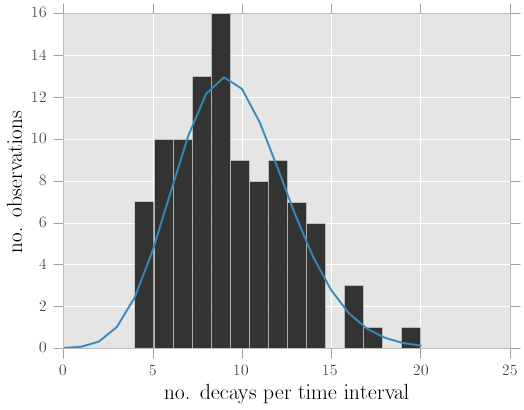

In [6]:
true_lambda = 10
nint = 100    # number of intervals
ndecay = stats.poisson.rvs(true_lambda, size=nint)
plt.hist(ndecay, bins=15)
x = np.arange(ndecay.max() + 1)
p = stats.poisson.pmf(x, ndecay.mean()) * nint
plt.plot(x, p, lw=2)
plt.xlabel('no. decays per time interval')
plt.ylabel('no. observations')

As we increase the amount of data (number of time intervals), the closer the data follow a Poisson
distribution. Note that if we doubled the time interval, then both $\lambda$ and the number of events per time
interval would double.

## Gaussian (Normal)

The Gaussian or Normal distribution is probably the best known and most commonly used distribution
in the physical sciences.

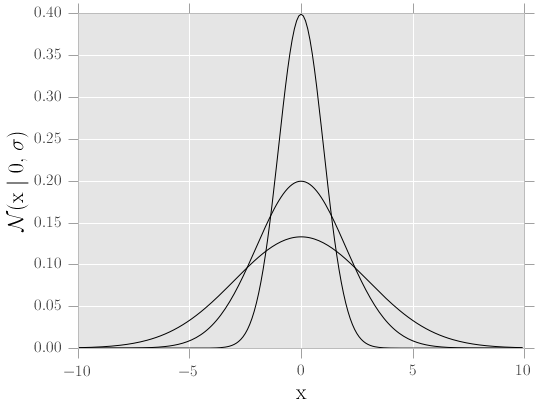

In [7]:
x = np.arange(-10, 10, 0.1)

for s in (1, 2, 3):
    plt.plot(x, stats.norm.pdf(x, 0, s), color='k')
plt.xlabel('x')
plt.ylabel('$\mathcal{N}$(x $\mid$ 0, $\sigma$)');

## Gamma

The gamma distribution is a semi-infinite distribution: it is only non-zero for $x > 0$.

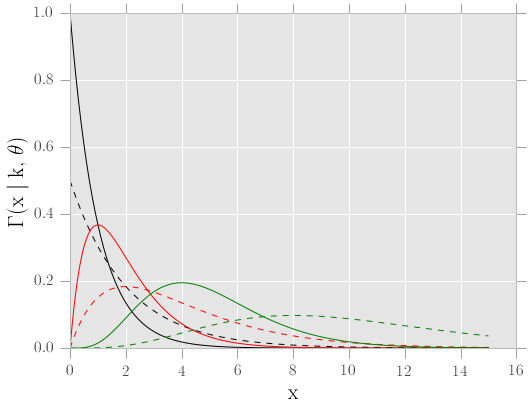

In [8]:
x = np.arange(0., 15.01, 0.05)
ls = ['-', '--']
co = ['k', 'r', 'g']
for shape, color in zip((1, 2, 5), co):
    for scale, lsk in zip((1, 2), ls):
        plt.plot(x, stats.gamma(shape, scale=scale).pdf(x), ls=lsk, color=color)
plt.xlabel('x')
plt.ylabel(r'$\Gamma$(x $\mid$ k, $\theta$)');

## Cauchy

also known as Lorentz distribution.
It is the distribution of a random variable that is the ratio of two independent standard normal variables.

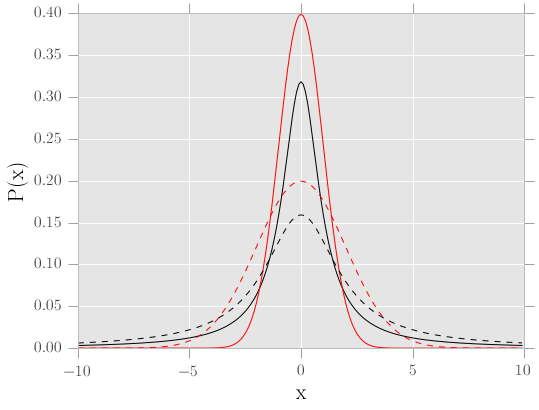

In [9]:
x = np.arange(-10, 10, 0.1)

for s, ls in zip((1, 2), ('-', '--')):
    plt.plot(x, stats.cauchy.pdf(x, 0, s), ls=ls, color='k')
    plt.plot(x, stats.norm.pdf(x, 0, s), ls=ls, color='r')

plt.xlabel('x')
plt.ylabel('P(x)');

The Cauchy distribution (solid lines) with zero mode and b equal to 1 and 2. The dashed
lines shows a Gaussian with zero mode and the same FWHM as the two Cauchy distributions.

## Exercices

** Exercise **

From the dataset `rvs.dat`, identify by eye which distribution likely generated these values. 
Tip: this may be a distribution that is **not** in the lecture's notes

In [48]:
from scipy import stats
import numpy as np

data = stats.beta(3, 1).rvs(1e4)
np.savetxt('rvs.dat', data)

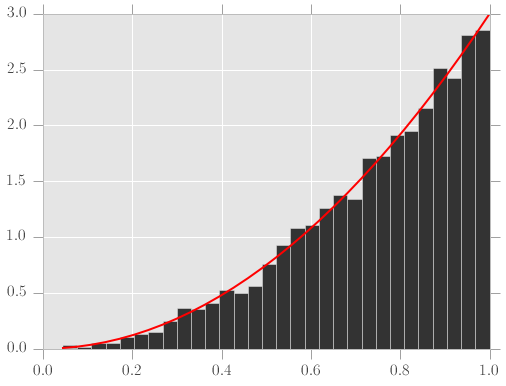

In [54]:
_, b, _ = plt.hist(data, bins=30, normed=True);
plt.plot(b, stats.powerlaw(3).pdf(b), 'r-', lw=2)

**Exercise**

You have two boxes with red and blue balls in each. 
* Box $I$ has 3 red and 2 blue balls. 
* Box $II$ has 2 red and 8 blue balls. 

A fair coin is tossed. If it lands heads you take a ball at random from box $I$. 
If tails, you take a ball at random from box $II$. What is the probability that the ball is red?

**Solution**
\begin{eqnarray}
P(R) &=& P (R \mid I) P(I) + P(R \mid II)P(II) \\
&=& 3/5 \times 1/2 + 2/10 \times 1/2 = 2/5
\end{eqnarray}

**Exercise**

Now someone else tosses the coin but doesn’t tell you whether it is head or tails. But she does tell you that a red ball was drawn. What is the probability that it was drawn from box $I$?

**solution**
calculate $P(I \mid R)$

$$ P(I \mid R) = P(R \mid I) P(I)/P(R)$$

$P(R)$ is given before as 
\begin{eqnarray}
P(R) &=& P (R \mid I) P(I) + P(R \mid II)P(II) \\
&=& 3/5 \times 1/2 + 2/10 \times 1/2 = 2/5
\end{eqnarray}

therefore
$$ P(I \mid R) = P(R \mid I) P(I)/P(R) = [3/5 \times 1/2] \times 5/2 = 3/4 $$


**Exercise**

If the chance of finding life on one planet is 1 in $n$, and you search for life on $n$ planets, what is the
probability of finding life on at least one planet? What is this in the limit as $n \rightarrow \infty$?

** Solution**
proba of finding life on 1 planet $p =  1 / n$

proba of not finding life an any of the n planets: $(1 - p) ^ n = (1 - 1/n) ^ n$

proba of finding at least life on one planet is therefore:
$ P = 1 − (1 − 1/n) ^ n$

in the limit $n \rightarrow \infty$, we have 

$\log(1 - P) = n \log (1 - 1/n) \sim n \times (-1/n) = -1 \Leftrightarrow P\rightarrow 1 - \exp(-1)$

**Exercise**

In a room full of people, how many people do you have to ask before there is a 50% chance (or
more) that any two or more of them share a common birthday? What are your asssumptions?

We assume $D = 365$ birthdays (equally probable) and $N$ people in the room.

We work from the opposite question as often in this formulation.

The number of ways to distribute the days such that nobody share the same date is 
$$A = D (D − 1)\ldots(D − N + 1) = D!/(D − N)! $$

The number of permutations to assign $D$ days is given by
$$B = D^N$$

therefore the probability of "no shared birthday" is
$$ P = A / B = \frac{D!}{D^N(D-N)!} $$

and so at least one shared day is
$$ P = 1 − A/B  = 1 - \frac{D!}{D^N(D-N)!} $$

 
    P(N=22) = 0.476
    P(N=23) = 0.507
    P(N=24) = 0.538
    


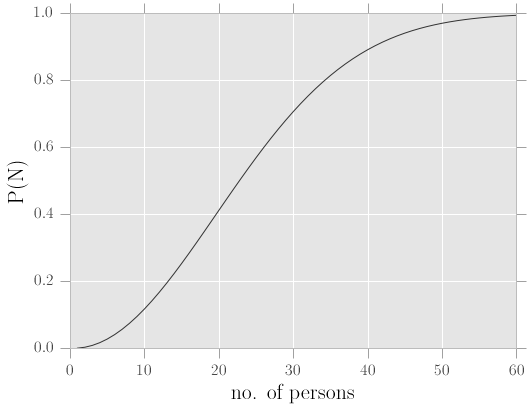

In [10]:
D = 365
N = 60

p = 1.0
P = []
for i in range(1, N + 1):
    p *= (D - i + 1) / D
    P.append(1 - p)
    
plt.plot(range(1, N+1), P);
plt.xlabel('no. of persons')
plt.ylabel('P(N)');

ind = np.searchsorted(P, 0.5)
print(""" 
    P(N={0:d}) = {1:0.3f}
    P(N={2:d}) = {3:0.3f}
    P(N={4:d}) = {5:0.3f}
    """.format(ind, P[ind-1], ind + 1, P[ind], ind + 2, P[ind + 1]))


**Exercise**

In a room full of people, how many people do you have to ask before there is a 50% chance (or more) that one of them shares your birthday?

**Solution**

Compared to the previous exercise, you impose one day

$D=365$ and $N-1$ persons in the room could potentially share your day.

As before, we start from the complement, i.e., none share your day and take the completement of it:

$$P = 1 - \frac{\left(D-1\right)}{D} ^ {N-1}$$

therefore $P=0.5$ leads to

$$ N = 1 + \log_{10} 0.5 / \log(364/365) \sim 253.6 \Rightarrow N = 254$$

**Exercise**

Show that the FWHM and IQR of the Cauchy distribution are equal to 2b.

Show that the mean, variance or any moment of the Cauchy distribution are undefined.

**solution**

* By definition a Cauchy density distribution is given by:

$$ f(x \mid a, b) = \frac{1}{\pi} \frac{b}{b^2 + (x-a)^2} $$

and fwhm is the $\Delta x$ such that  $f(x\pm\Delta x) = f_{max}/ 2$

obviously, 
$$f_{max} = f(a \mid a, b) = \frac{1}{\pi b}$$

and the solution of $f(x \mid a, b) = f_{max} / 2$ has solutions given by 

$$ \frac{1}{\pi b} \frac{1}{\pi} \frac{b}{b^2 + (x-a)^2} $$
$$ (x-a) = \pm b \Rightarrow \Delta x = 2 b $$

* IQR = interquartile:  $IQR = Q_3 - Q1 = CDF(0.75) - CDF(0.25)$

the cumulative distribution is given by the integral of the density, 

$$ F(x \mid a, b) = \frac{1}{\pi} \arctan\left(\frac{x-a}{b}\right) + \frac{1}{2} $$

therefore

$$ Q(F) = a + b \tan(\pi (F - 1/2)) $$

$$ \Rightarrow Q_3 - Q1 = 2b \tan(\pi/4) = 2b $$

* by definintion, the mean is given by

$$ \mathbb{E}(X) =  \int_{-\infty}^{\infty} x f(x) dx = \int_{-\infty}^{a} x f(x) dx + \int_{a}^{\infty} x f(x) dx = 2\,\int_{a}^{\infty} x f(x) dx$$

$$ \mathbb{E}(X) \propto \int_{a}^{\infty} \frac{x}{b^2 + (x-a)^2} dx \sim \left[ \frac{1}{\pi}\arctan \left(\frac{x-a}{b}\right)\right]_a^{\infty} + ...$$

No need to go further, the first term is undefined.

* if we center the distribution on 0, by definintion, the moments are given by

$$ \mathbb{E}(X) =  \int_{-\infty}^{\infty} x^k f(x) dx =  = \int_{-\infty}^{\infty} x^{k-1}\, x f(x) dx$$

if becomes obvious that integration by parts will give us quickly the same term as before. No need to go further.


**Exercise**

Children inherit a fair-mix of the genetic material of both of their parents. Blood type is one of the famous examples in this domain. Blood type O is a recessive gene feature, and thus requires that both parents transmit the blood type gene to the baby. However it is also the most common gene, almost everyone has this gene.

* If you suppose that both parents have this gene, what is the probability that a child born has a blood type O?

If these parents have 5 children, 

* what is the probability that exactly 2 of them have type O blood? plot it for other values
* What is the expected number of children with type O blood?
* What is the probability of at least 2 children with type O blood?


**solution**

probability of type O: $p = 1/4$

if $N=5$ children, the probability of $n=2$ have blood type O is 
$$ P(n=2\mid N=5) = p ^ n \times (1 - p) ^ {N-n} \times \frac{N!}{n!(N-n)!} \approx 0.264$$

the expected number with blood type O is 
$$ \mu = \sum_{k=1}^{N} 1 \times p = 5 \times 1/4 = 1.25 $$

the probability of at least 2 have blood type O

\begin{eqnarray}
P( n \geq 2 ) &=& 1 - [P(n = 0) + P(n=1)] \\
&=& 1 - \sum_{k=0}^{1} P(n=k \mid N=5) \\
&\approx& 0.367
\end{eqnarray}

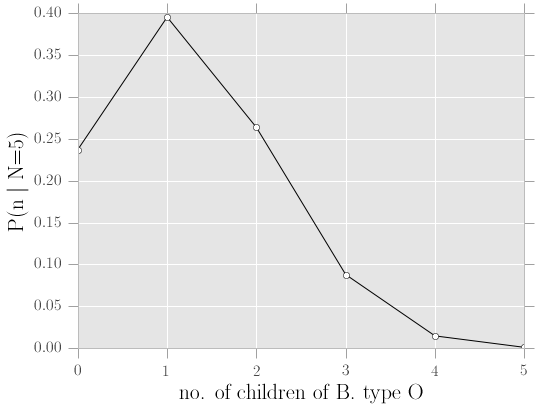

In [4]:
from math import factorial
N = 5
n = np.arange(N+1)
p = 1. / 4.
P = [factorial(N) / (factorial(nk) * factorial(N - nk)) * p ** nk * (1-p) ** (N-nk) for nk in n]

plt.plot(n, P, 'ko-', mfc='w')
plt.xlabel('no. of children of B. type O')
plt.ylabel('P(n $\mid$ N=5)');
    

**Exercise**

Let $X$ represent the fraction of the population in a certain city who obtain the flu vaccine.
and $X$ follows a probability distribution $P(x) = 2 x$  (if $0\leq x \leq 1$).

Note that this distribution is correctly normalized.

* Find $P(1/4 \leq X \leq 1/2)$
* Find $P(X > 1/2)$
* What expectation and variance?

**solution**

* $P(1/4 \leq X \leq 1/2) = \int_{1/4}^{1/2} P(x)dx = 3/16$
* $P(X > 1/2) = \int_{1/2}^{1} P(x)dx = 3 / 4$
* $\mu = \int_0^1 x P(x) dx = 2/3$, $V=\int_0^1 (x-\mu) ^ 2 P(x) dx = 1/2-(4 \mu) / 3 + \mu^2 = 1/16$